<a href="https://colab.research.google.com/github/JDVAR7/2123-ia-aplicada-a-data-science-construccion-de-visualizaciones/blob/main/explorand_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importe de las diferentes Bibliotecas**

In [63]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [64]:
flights = pd.read_csv('/content/flights.csv')

# **Revisión de datos e información sobre el DataFrama**

In [65]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [66]:
flights.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [67]:
flights.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [68]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('winter')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

# **IMplementación de graficaspara analisis del DataFrame**

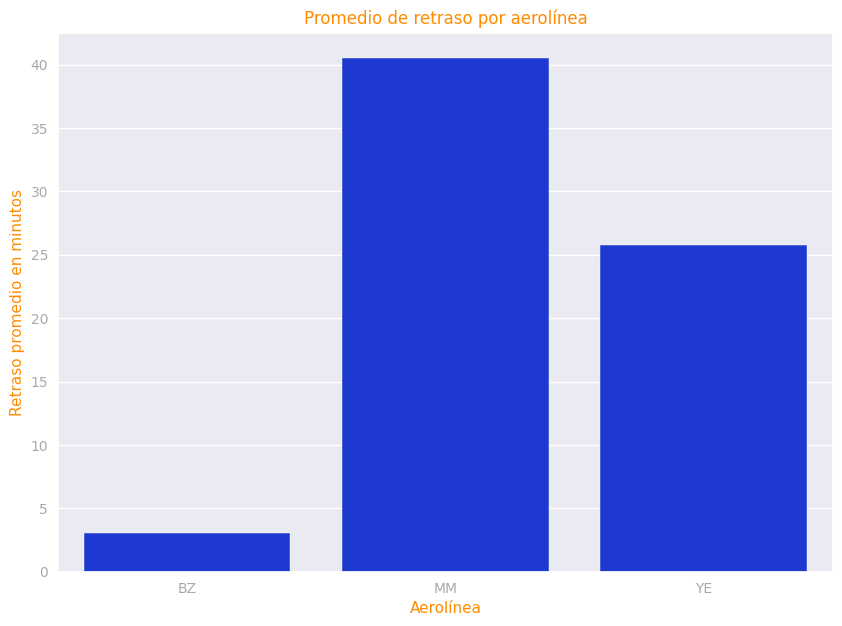

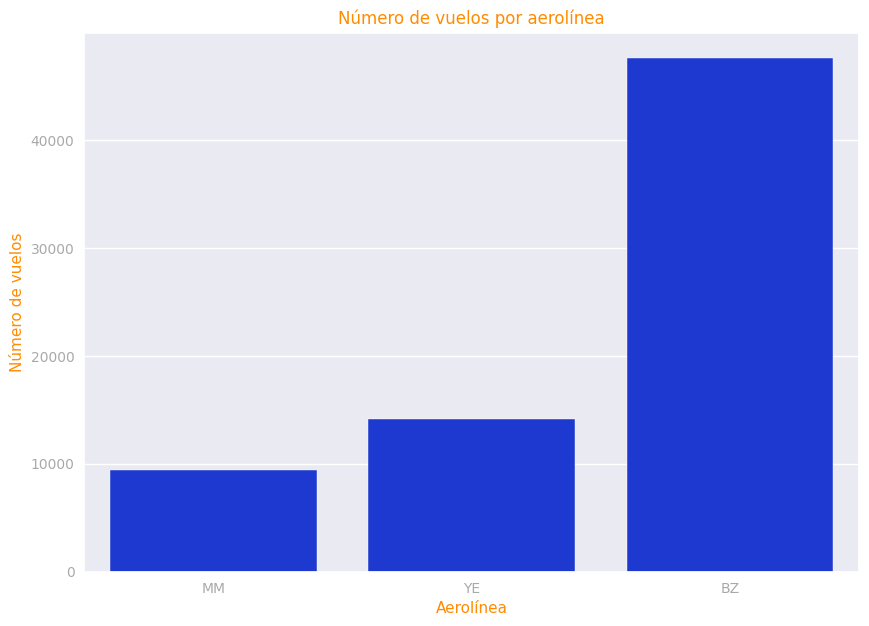

In [69]:
avg_delay = flights.groupby('airline')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='airline', y='delay', data=avg_delay, ax=ax)
plt.title('Promedio de retraso por aerolínea', color='darkorange')
plt.xlabel('Aerolínea', color='darkorange')
plt.ylabel('Retraso promedio en minutos', color='darkorange')
plt.show()

# For the second plot, create a new figure and axes to apply custom tick colors
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.countplot(x='airline', data=flights, ax=ax2)
plt.title('Número de vuelos por aerolínea', color='darkorange')
plt.xlabel('Aerolínea', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color for the second plot
for tick_label in ax2.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color for the second plot
for tick_label in ax2.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

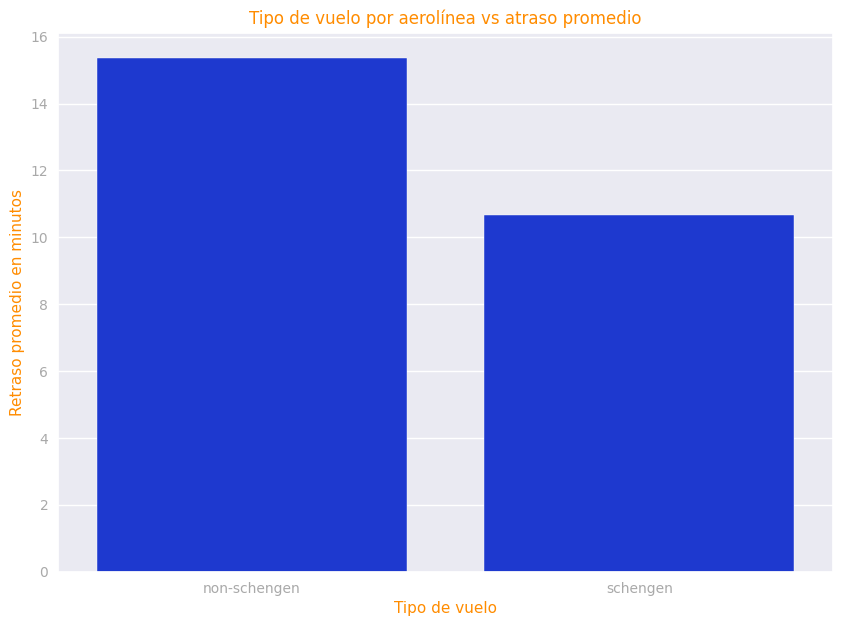

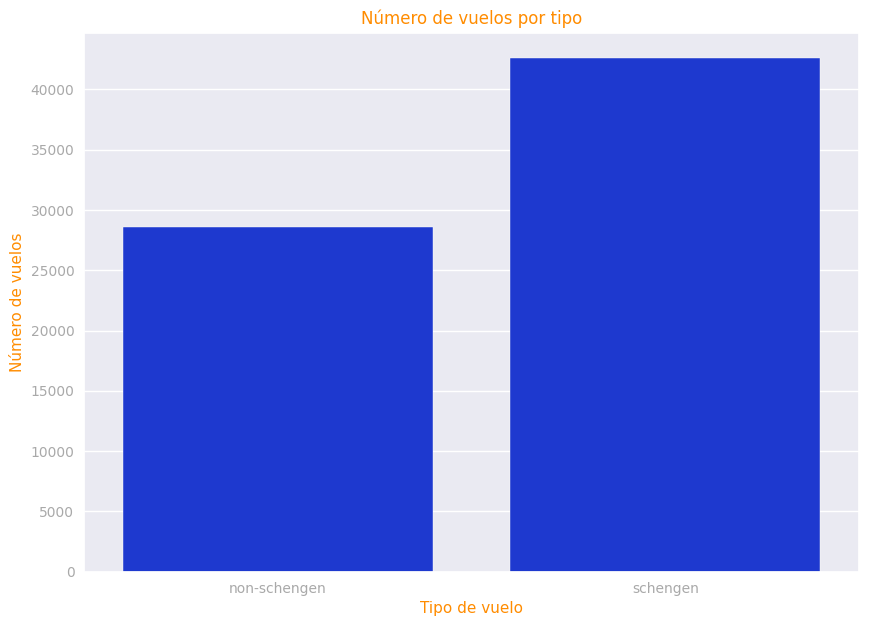

In [70]:
avg_delay = flights.groupby('schengen')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='schengen', y='delay', data=avg_delay, ax=ax)
plt.title('Tipo de vuelo por aerolínea vs atraso promedio', color='darkorange')
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Retraso promedio en minutos', color='darkorange')
plt.show()

# For the second plot, create a new figure and axes to apply custom tick colors
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.countplot(x='schengen', data=flights, ax=ax2)
plt.title('Número de vuelos por tipo', color='darkorange')
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color for the second plot
for tick_label in ax2.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color for the second plot
for tick_label in ax2.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

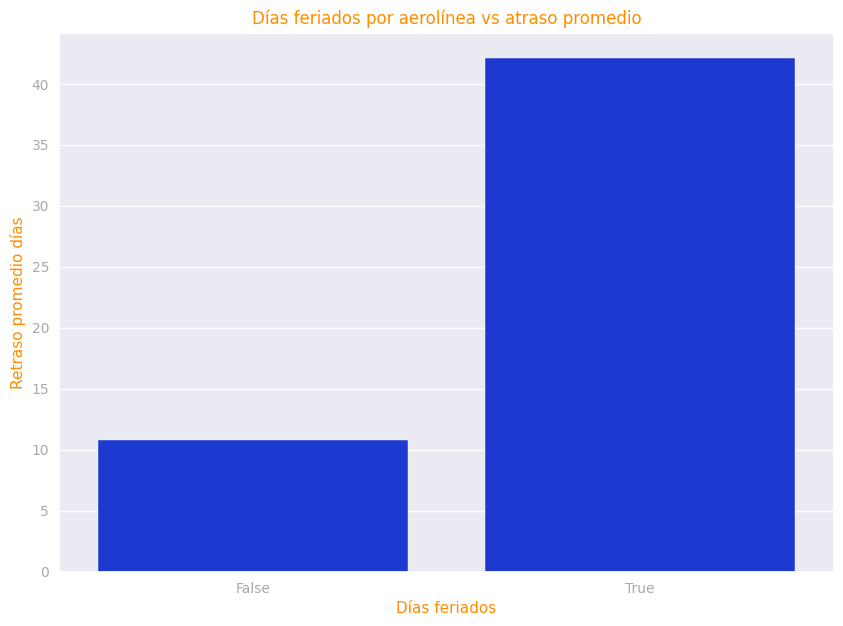

In [71]:
avg_delay = flights.groupby('is_holiday')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='is_holiday', y='delay', data=avg_delay, ax=ax)
plt.title('Días feriados por aerolínea vs atraso promedio', color='darkorange')
plt.xlabel('Días feriados', color='darkorange')
plt.ylabel('Retraso promedio días', color='darkorange')
plt.show()

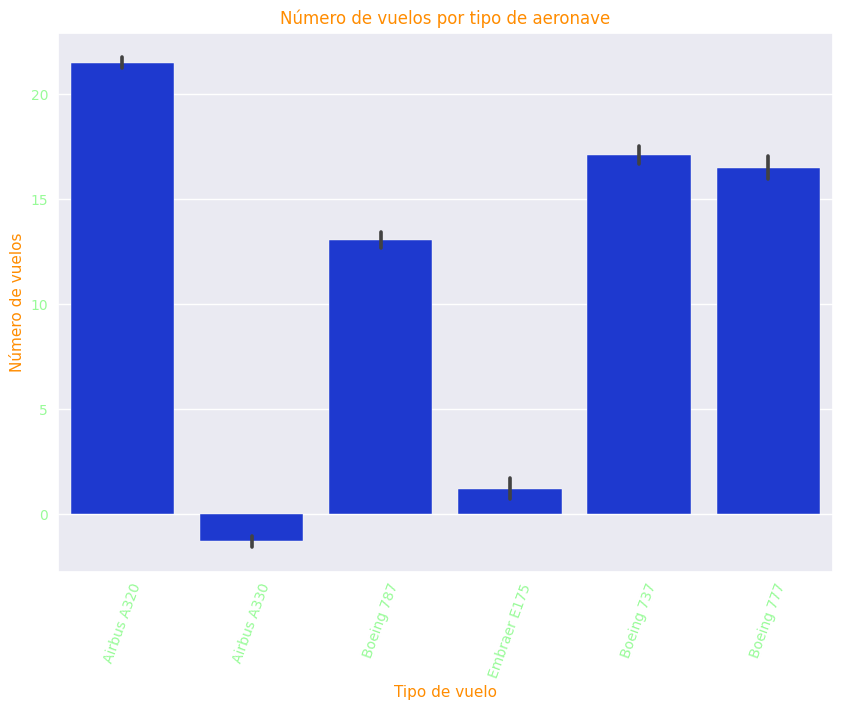

In [72]:
order = flights['aircraft_type'].value_counts().index

fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='aircraft_type', y='delay', data=flights, order=order, ax=ax)
plt.title('Número de vuelos por tipo de aeronave', color='darkorange')
plt.xticks(rotation=70)
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('palegreen')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('palegreen')

plt.show()

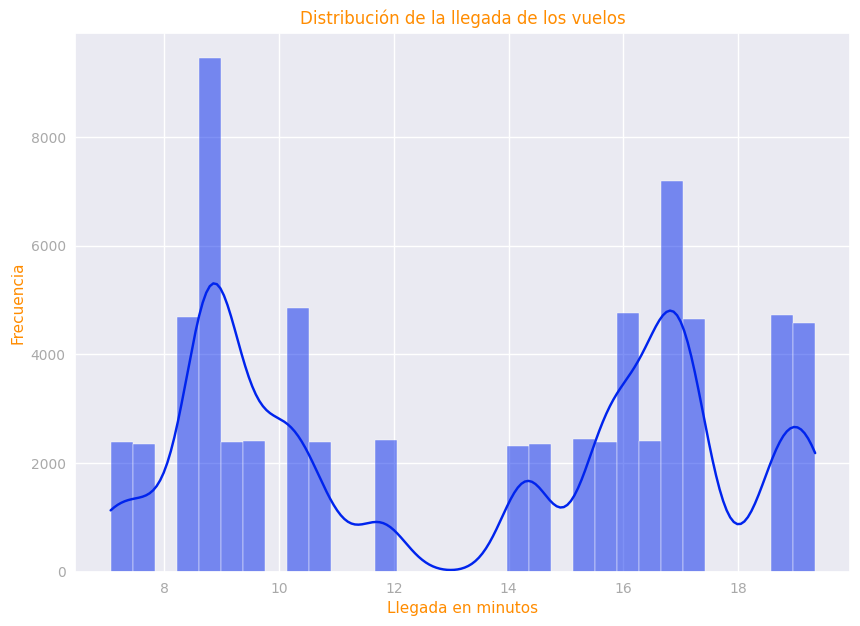

In [73]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='arrival_time', data=flights, kde=True, ax=ax)
plt.title('Distribución de la llegada de los vuelos', color='darkorange')
plt.xlabel('Llegada en minutos', color='darkorange')
plt.ylabel('Frecuencia', color='darkorange')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

[en.wikipedia.org/wiki/Freedman-Diaconis_rule](https://en.wikipedia.org/wiki/Freedman-Diaconis_rule)

# Consulta de la regla para evaluación de la formula y función del rango intercuantil

In [74]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75-q25
  ancho = 2* iqr* np.power(len(df[columna]), -1/3)
  return ancho

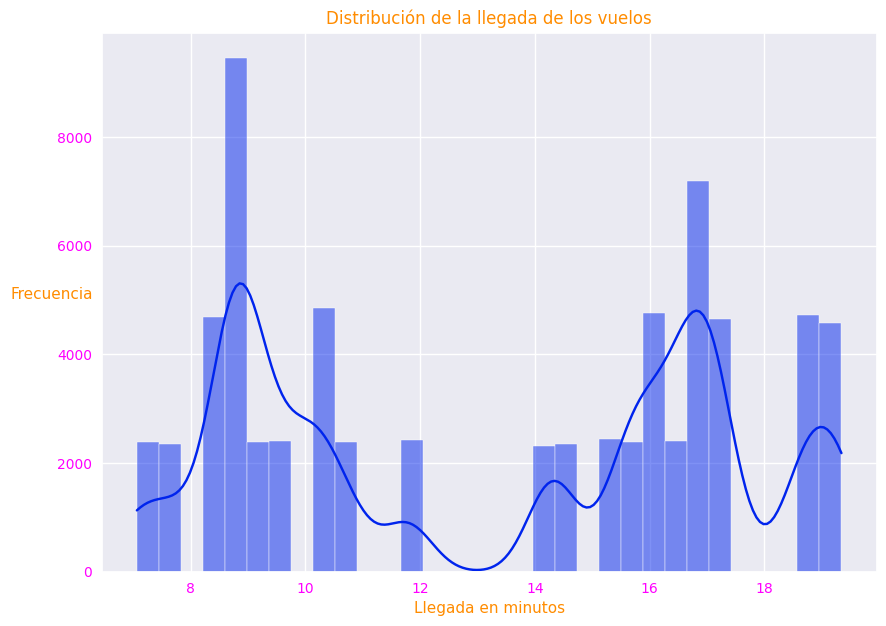

In [75]:
binwidth = ancho_bin(flights, 'arrival_time')
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='arrival_time', data=flights, kde=True, binwidth=binwidth, ax=ax)
plt.title('Distribución de la llegada de los vuelos', color='darkorange')
plt.xlabel('Llegada en minutos', color='darkorange')
plt.ylabel('Frecuencia', color='darkorange', rotation=0)

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('magenta')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('magenta')

plt.show()

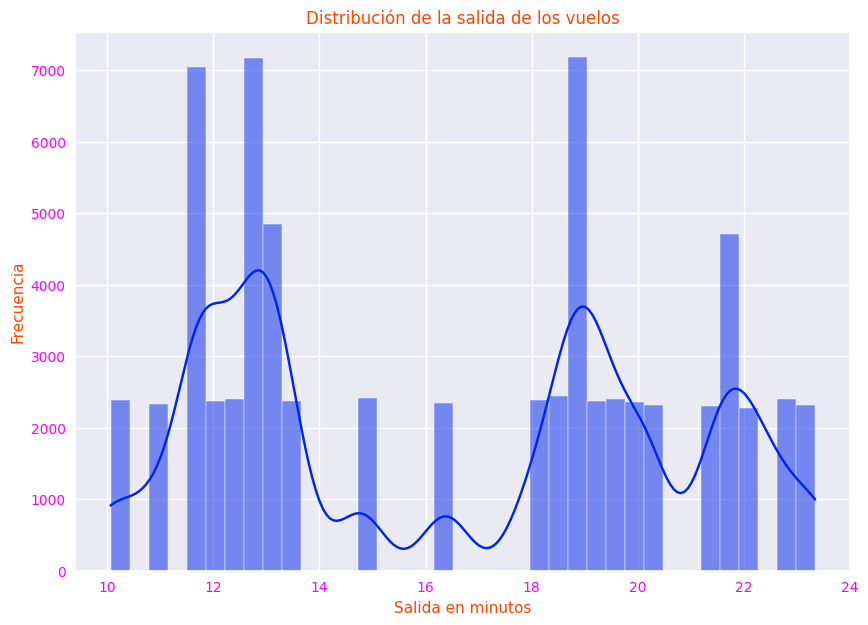

In [76]:
binwidth = ancho_bin(flights, 'departure_time')
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='departure_time', data=flights, kde=True, binwidth=binwidth, ax=ax)
plt.title('Distribución de la salida de los vuelos', color='orangered')
plt.xlabel('Salida en minutos', color='orangered')
plt.ylabel('Frecuencia', color='orangered')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('magenta')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('magenta')

plt.show()

In [77]:
atraso_promedio = flights['delay'].mean()
atraso_mediana = flights['delay'].median()

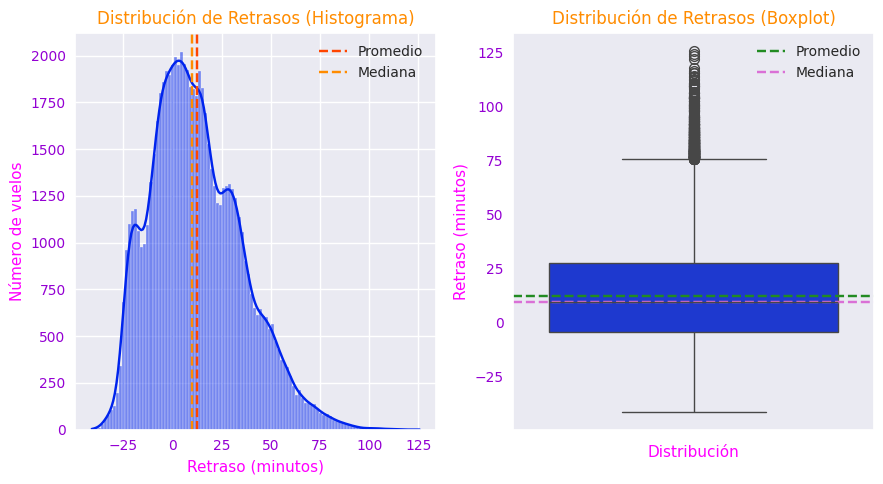

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

# Plot 1: Histogram of 'delay'
sns.histplot(x='delay', data=flights, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Retrasos (Histograma)', color='darkorange')
ax[0].axvline(x=atraso_promedio, color='orangered', label='Promedio', linestyle='--')
ax[0].axvline(x=atraso_mediana, color='darkorange', label='Mediana', linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Retraso (minutos)', color='magenta')
ax[0].set_ylabel('Número de vuelos', color='magenta')

# Plot 2: Boxplot of 'delay' (now with delay on y-axis, vertical boxplot)
sns.boxplot(y='delay', data=flights, ax=ax[1])
ax[1].set_title('Distribución de Retrasos (Boxplot)', color='darkorange')
ax[1].axhline(y=atraso_promedio, color='forestgreen', label='Promedio', linestyle='--')
ax[1].axhline(y=atraso_mediana, color='orchid',  label='Mediana', linestyle='--')
ax[1].legend()
ax[1].grid(False) # Keep grid setting
ax[1].set_xlabel('Distribución', color='magenta') # X-label for vertical boxplot (categorical)
ax[1].set_ylabel('Retraso (minutos)', color='magenta') # Y-label for vertical boxplot

# Apply tick label colors to both subplots using a loop over the ax array
for subplot_ax in ax.flat:
    # Change x-axis tick labels color
    for tick_label in subplot_ax.get_xticklabels():
        tick_label.set_color('darkviolet')
    # Change y-axis tick labels color
    for tick_label in subplot_ax.get_yticklabels():
        tick_label.set_color('darkviolet')

plt.tight_layout()
plt.show()

In [79]:
flights.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

# **Feature engineering**
Clsificando data

In [80]:
flights['date'] = flights['year'].astype(str) + '-' +( flights['day']+1).astype(str)
flights['date'] = pd.to_datetime(flights['date'], format='%Y-%j')
flights.tail(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [81]:
flights['weekend'] = flights['date'].dt.weekday.isin([5, 6]).astype(int)
flights['day_name'] = flights['date'].dt.day_name()
flights.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,weekend,day_name
12561,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,107,2012,False,10.623508,2012-04-17,0,Tuesday
18114,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,112,2013,False,49.292163,2013-04-23,0,Tuesday
30518,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,209,2015,False,30.658801,2015-07-29,0,Wednesday
9846,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,291,2011,False,-7.872862,2011-10-19,0,Wednesday
28191,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,54,2015,False,-9.515111,2015-02-24,0,Tuesday
14676,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,248,2012,False,-20.242272,2012-09-05,0,Wednesday
8399,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,194,2011,False,51.673839,2011-07-14,0,Thursday


In [82]:
flights['schengen'] = flights['schengen'].map({'schengen': 1, 'non-schengen': 0}).astype(int)
flights['is_holiday'] = flights['is_holiday'].astype(int)
flights.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,weekend,day_name
14553,12,YE,Airbus A330,1,TZF,17.313731,21.313731,240,2012,0,-1.697163,2012-08-28,0,Tuesday
30414,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,202,2015,0,24.823600,2015-07-22,0,Wednesday
6479,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,66,2011,0,1.005605,2011-03-08,0,Tuesday
49304,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,1,2019,0,5.493463,2019-01-02,0,Wednesday
20856,16,MM,Airbus A320,0,CSF,17.041281,20.041281,295,2013,0,52.977243,2013-10-23,0,Wednesday
61442,19,MM,Airbus A320,1,TZF,16.245220,19.245220,81,2021,0,31.172950,2021-03-23,0,Tuesday
29570,12,YE,Airbus A330,1,TZF,17.313731,21.313731,146,2015,0,14.858192,2015-05-27,0,Wednesday


In [83]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  int64         
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  int64         
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  weekend         71175 non-null  int64         
 13  day_name        71175 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)


# Feature encoding

In [84]:
categorias = ['airline', 'aircraft_type', 'origin', 'day_name']
pd.get_dummies(data=flights, columns=categorias, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [85]:
datos_codif = pd.get_dummies(data=flights, columns=categorias, dtype=int)
datos_codif.sample(9)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
22912,24,1,9.668655,12.668655,67,2014,0,12.259633,2014-03-09,1,...,0,0,0,0,0,0,1,0,0,0
64820,23,1,18.801235,21.801235,306,2021,0,14.290567,2021-11-03,0,...,1,0,0,0,0,0,0,0,0,1
34512,17,0,16.718722,21.718722,110,2016,0,-3.819680,2016-04-20,0,...,0,0,0,0,0,0,0,0,0,1
23019,25,0,19.341235,23.341235,74,2014,0,3.795046,2014-03-16,1,...,0,0,0,0,0,0,1,0,0,0
573,25,0,19.341235,23.341235,38,2010,0,14.788352,2010-02-08,0,...,0,0,0,0,1,0,0,0,0,0
62156,1,0,15.496519,18.496519,128,2021,0,14.649652,2021-05-09,1,...,0,0,0,0,0,0,1,0,0,0
67226,5,1,9.344097,12.344097,101,2022,0,-2.707389,2022-04-12,0,...,0,0,1,0,0,0,0,0,1,0
45910,21,1,7.065594,10.065594,140,2018,0,38.288681,2018-05-21,0,...,0,0,0,0,1,0,0,0,0,0
10398,17,0,16.718722,21.718722,328,2011,0,11.212115,2011-11-25,0,...,0,0,0,1,0,0,0,0,0,0


# Limpiando data

In [86]:
flights[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [87]:
datos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   weekend                     71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [88]:
DF = datos_codif.drop(columns=['flight_id', 'year', 'day', 'date', 'departure_time'])
DF.sample(7)

,schengen,arrival_time,is_holiday,delay,weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
37167,0,16.718722,0,21.536167,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
58092,1,18.801235,0,19.774250,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
58932,1,18.635384,0,-38.916164,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
67770,0,8.939996,0,18.081848,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
14945,0,16.571894,0,13.755982,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
63710,1,17.033688,0,3.427855,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
42307,1,15.729617,0,24.985812,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


# **Definiendo una Baseline**

# [scikit-learn.org/stable/](https://scikit-learn.org/stable/)

Consulta de documentación 'sklearn'

In [89]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [90]:
X = DF.drop(['delay'], axis=1)
y = DF['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def Calcular_regresion(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {'MAE': round(mae,4), 'RMSE': round(mse**(1/2),4), 'R2': round(r2,4)}
  return metricas

In [92]:
resultados_baseline = Calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'MAE': 18.53, 'RMSE': 23.1223, 'R2': -0.0}

# **Entrenando con bosques aleatorios**

In [93]:
from sklearn.ensemble import RandomForestRegressor

modelo= RandomForestRegressor(max_depth=5, random_state=43)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultado_rf = Calcular_regresion(y_test, ypred)
resultado_rf

{'MAE': 11.0805, 'RMSE': 13.7886, 'R2': 0.6444}

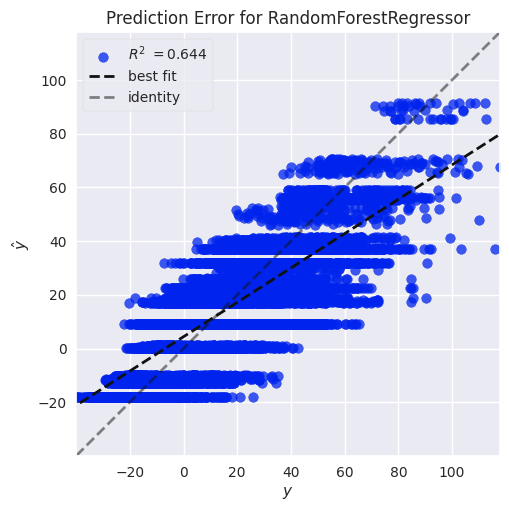

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [94]:
from yellowbrick.regressor import PredictionError

visualizador = PredictionError(modelo);

visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
visualizador.show()

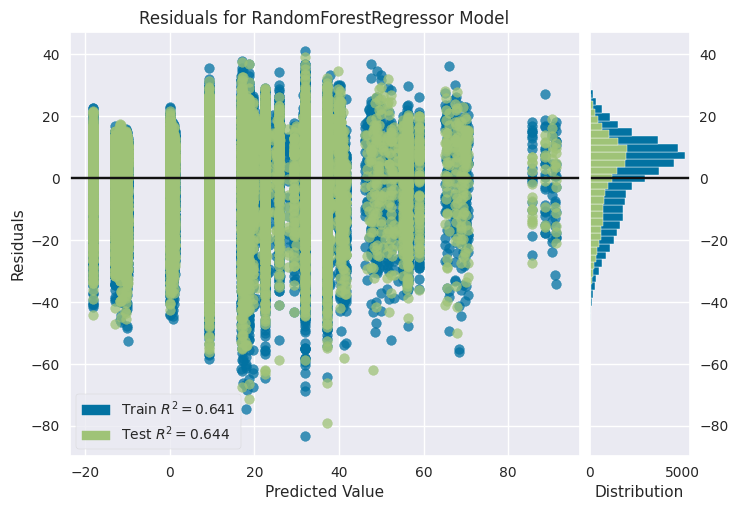

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [95]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(modelo)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
visualizador.show()

In [96]:
from sklearn.model_selection import KFold, cross_validate

In [97]:
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAE': 'neg_mean_absolute_error','R2': 'r2'}

cv = KFold(n_splits=5, shuffle=True, random_state=43)
cv_result = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)
cv_result

{'fit_time': array([3.20372653, 3.16890645, 3.23351932, 4.2177887 , 3.15275025]),
 'score_time': array([0.08996344, 0.06214738, 0.08299708, 0.06923485, 0.0640204 ]),
 'test_RMSE': array([-14.15055298, -13.80740829, -13.75403426, -13.87198372,
        -13.77581888]),
 'test_MAE': array([-11.29593271, -11.09186737, -11.03046726, -11.13760621,
        -11.07919534]),
 'test_R2': array([0.62954186, 0.63573335, 0.63856612, 0.65084492, 0.6456646 ])}

# **Feature Importances**

In [98]:
len(DF.columns)

31

In [99]:
Importances = modelo.feature_importances_

In [100]:
feature_importances = pd.DataFrame({'features': X.columns, 'importances': (Importances*100).round(2)}).sort_values('importances', ascending=False)
feature_importances

,features,importances
4,airline_BZ,52.77
2,is_holiday,14.87
7,aircraft_type_Airbus A320,10.08
8,aircraft_type_Airbus A330,5.85
12,aircraft_type_Embraer E175,4.58
1,arrival_time,4.25
11,aircraft_type_Boeing 787,2.31
20,origin_TCY,2.14
19,origin_PUA,1.14
15,origin_CSF,1.11


In [101]:
resultado = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=43)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = Calcular_regresion(y_test, y_pred)
  resultado[i] = list(metricas.values())

resultado

,1,5,10,15,20,25,30
RMSE,14.9513,12.1180,11.0984,11.0808,11.0801,11.0806,11.0805
MAE,18.7985,15.1875,13.8034,13.7911,13.7894,13.7889,13.7886
R2,0.3390,0.5686,0.6436,0.6443,0.6443,0.6444,0.6444


In [102]:
resultado = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=43)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = Calcular_regresion(y_test, y_pred)
  resultado[i] = list(metricas.values())

resultado

,10,11,12,13,14,15
RMSE,11.0984,11.0978,11.0823,11.0823,11.0816,11.0808
MAE,13.8034,13.7992,13.7912,13.7912,13.7906,13.7911
R2,0.6436,0.6438,0.6443,0.6443,0.6443,0.6443


In [103]:
selected_features = feature_importances['features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_PUA,origin_CSF,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=43)

In [105]:
param_grid = {
              'max_depth': [5, 10, 15],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [100, 150, 200]
              }

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
cv = KFold(n_splits=5, shuffle=True, random_state=43)
model_grid = GridSearchCV(RandomForestRegressor(random_state=43), param_grid=param_grid, scoring='r2', cv=cv)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=43, shuffle=True),
             estimator=RandomForestRegressor(random_state=43),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [108]:
model_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [109]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = Calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'MAE': 10.6751, 'RMSE': 13.2758, 'R2': 0.6728}

In [110]:
resultado['modelo_grid'] = list(metricas_model_grid.values())
resultado

,10,11,12,13,14,15,modelo_grid
RMSE,11.0984,11.0978,11.0823,11.0823,11.0816,11.0808,10.6751
MAE,13.8034,13.7992,13.7912,13.7912,13.7906,13.7911,13.2758
R2,0.6436,0.6438,0.6443,0.6443,0.6443,0.6443,0.6728


In [114]:
import pickle

try:
  with open('Definitive.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

  print('Modelo serializado con exito')
except Exception as e:
  print(f'Error al serializar el modelo:', str(e))

Modelo serializado con exito


In [115]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]